In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random as r

In [ ]:
class Spline:
    def __init__(self, a, b, c, d, x):
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        self.x = x

In [ ]:
def create_spline(x, y, count):
    spline_arr = np.array([Spline(0, 0, 0, 0, 0) for _ in range(0, count)])
    for i in range(0, count):
        spline_arr[i].x = x[i]
        spline_arr[i].a = y[i]
    
    spline_arr[0].c = spline_arr[count - 1].c = 0.0
    alpha = [0.0 for _ in range(0, count - 1)]
    beta  = [0.0 for _ in range(0, count - 1)]
 
    for i in range(1, count - 1):
        hi  = x[i] - x[i - 1]
        hi1 = x[i + 1] - x[i]
        A = hi
        B = hi1
        C = 2.0 * (hi + hi1)
        F = 6.0 * ((y[i + 1] - y[i]) / hi1 - (y[i] - y[i - 1]) / hi)
        Z = (A * alpha[i - 1] + C)
        alpha[i] = -B / Z
        beta[i] = (F - A * beta[i - 1]) / Z
  
    for i in range(count - 2, 0, -1):
        spline_arr[i].c = alpha[i] * spline_arr[i + 1].c + beta[i]

    for i in range(count - 1, 0, -1):
        hi = x[i] - x[i - 1]
        spline_arr[i].d = (spline_arr[i].c - spline_arr[i - 1].c) / hi
        spline_arr[i].b = hi * (2.0 * spline_arr[i].c + spline_arr[i - 1].c) / 6.0 + (y[i] - y[i - 1]) / hi
    return spline_arr

In [ ]:
def interpolation(spline_arr, x):
    if spline_arr.size == 0:
        return None

    n = len(spline_arr)
    s = Spline(0, 0, 0, 0, 0)
    
    if (x <= spline_arr[0].x):
        s = spline_arr[0]
    elif (x >= spline_arr[n - 1].x):
        s = spline_arr[n - 1]
    else:
        i = 0
        j = n - 1
        while (i + 1 < j):
            k = i + (j - i) // 2
            if (x <= spline_arr[k].x):
                j = k
            else:
                i = k
        s = spline_arr[j]  
    dx = x - s.x
    return s.a + (s.b + (s.c / 2.0 + s.d * dx / 6.0) * dx) * dx

In [ ]:
y = np.array([-0.565, -0.616, 0.319, -0.122, 0.758, 0.813, -0.799, -0.016, -0.977, 0.74, -0.302, -0.541])
x = np.arange(len(y))
predict_x = np.array([])
predict_y = np.array([])

spline = create_spline(x, y, len(x))

for i in range(0, len(x) * 10):
  j = i / 10
  predict_x = np.append(predict_x, j)
  predict_y = np.append(predict_y, interpolation(spline, predict_x[i]))

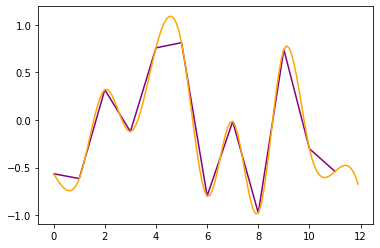

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y, color = 'purple')
ax.plot(predict_x, predict_y, color = 'orange')
plt.show()

Введите количество точек: 28
y:  [-0.719  0.365 -0.918  0.603 -0.618  0.524  0.713 -0.022  0.839  0.623
  0.449 -0.953 -0.07  -0.858 -0.287  0.699 -0.978  0.288 -0.754 -0.036
  0.64   0.74   0.162  0.17  -0.172 -0.736  0.337  0.239]
 


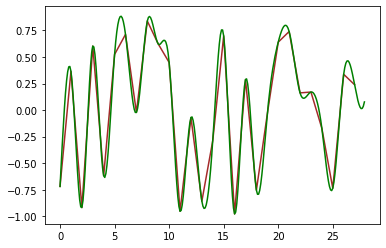

In [ ]:
points_number = int(input("Введите количество точек: "))
y = np.array([r.uniform(-1, 1) for _ in range(0, points_number)])
y = np.around(y, 3)
x = np.arange(len(y))
print("y: ", y)
print(" ")

predict_x = np.array([])
predict_y = np.array([])

spline = create_spline(x, y, len(x))

for i in range(0, len(x) * 10):
  j = i / 10
  predict_x = np.append(predict_x, j)
  predict_y = np.append(predict_y, interpolation(spline, predict_x[i]))

fig, bx = plt.subplots()
bx.plot(x, y, color = 'brown')
bx.plot(predict_x, predict_y, color = 'green')
plt.show()